In [18]:
# Common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from collections import Counter





In [2]:
train = pd.read_csv("fraud_test.csv", na_values=[], keep_default_na=False)
test = pd.read_csv("fraud_train.csv", na_values=[], keep_default_na=False)

In [3]:
train.head(5)


,Unnamed: 0,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,475876,0,0.9,0.369793,24,13,30,0.001326,-1.126874,AC,...,-1,1,200.0,0,INTERNET,36.511430,windows,0,1,3
1,167879,0,0.5,0.083668,-1,309,40,0.008947,5.078960,AA,...,9,1,200.0,0,INTERNET,3.239791,linux,1,1,1
2,664899,0,0.1,0.696961,-1,103,40,0.005718,-0.814751,AC,...,-1,1,200.0,0,INTERNET,1.616065,linux,1,1,4
3,286057,0,0.2,0.994658,-1,79,30,0.007246,-0.891274,AA,...,10,0,200.0,0,INTERNET,6.260271,windows,1,1,2
4,151209,0,0.8,0.190692,-1,169,40,0.000279,26.996700,AA,...,1,0,200.0,0,INTERNET,4.300698,windows,1,1,1


In [4]:
train.describe()


,Unnamed: 0,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,...,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,501805.266760,0.010580,0.562448,0.494345,16.678880,86.550380,33.658800,1.027825e+00,8.512704,1568.330000,...,0.414400,0.889280,10.868900,0.223460,518.438000,0.025360,7.470205,0.576520,1.018600,3.301180
std,288631.172099,0.102315,0.290599,0.289217,43.488668,88.459624,11.976312,5.440726e+00,19.974040,998.050951,...,0.492623,0.313788,12.131161,0.416568,488.381091,0.157218,7.896435,0.494115,0.179038,2.209789
min,24.000000,0.000000,0.100000,0.000025,-1.000000,-1.000000,10.000000,2.384686e-07,-13.901393,2.000000,...,0.000000,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
25%,253722.750000,0.000000,0.300000,0.224785,-1.000000,19.000000,20.000000,7.083212e-03,-1.178847,893.000000,...,0.000000,1.000000,-1.000000,0.000000,200.000000,0.000000,3.064126,0.000000,1.000000,1.000000
50%,502295.000000,0.000000,0.600000,0.493095,-1.000000,52.000000,30.000000,1.505139e-02,-0.829567,1263.000000,...,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,5.087448,1.000000,1.000000,3.000000
75%,750986.750000,0.000000,0.800000,0.756377,13.000000,130.000000,40.000000,2.627801e-02,3.722536,1946.000000,...,1.000000,1.000000,25.000000,0.000000,510.000000,0.000000,8.799728,1.000000,1.000000,5.000000
max,999997.000000,1.000000,0.900000,0.999967,361.000000,419.000000,90.000000,7.529524e+01,112.756111,6470.000000,...,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,80.305825,1.000000,2.000000,7.000000


In [5]:
train['fraud_bool'].value_counts()


,count
fraud_bool,
0,49471
1,529


In [6]:
train['fraud_bool'].value_counts(normalize=True)


,proportion
fraud_bool,
0,0.98942
1,0.01058


# חלוקה לפי מה שנדרש

In [7]:
# חודשים 0–5 -> אימון
# חודשים 6–7 -> ולידציה
train_df = train[train["month"] <= 5].copy()
val_df = train[train["month"] > 5].copy()

In [9]:
def preprocess_baf_auto_scaled(df, target_col="fraud_bool"):
    df = df.copy()
    # מפרידים תכונות ומטרה
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # זיהוי עמודות
    num_cols = X.select_dtypes(include=["int64", "float64"]).columns
    cat_cols = X.select_dtypes(include=["object", "category"]).columns

    # נרמול לעמודות מספריות
    scaler = StandardScaler()
    X_num = pd.DataFrame(scaler.fit_transform(X[num_cols]), columns=num_cols, index=X.index)

    # One-hot לעמודות קטגוריות
    X_cat = pd.get_dummies(X[cat_cols], drop_first=True)

    # איחוד
    X_processed = pd.concat([X_num, X_cat], axis=1)

    return X_processed, y


In [10]:
# עיבוד קבוצות
train_X, train_y = preprocess_baf_auto_scaled(train_df)
val_X, val_y = preprocess_baf_auto_scaled(val_df)

# התאמת העמודות בין הקבוצות
val_X = val_X.reindex(columns=train_X.columns, fill_value=0)


In [13]:
def evaluate_model(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    y_scores = model.predict_proba(X_test)[:, 1]
    print(f"\n--- {title} ---")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(f"Confusion Matrix - {title}")
    plt.show()
    print("ROC-AUC:", roc_auc_score(y_test, y_scores))
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr)
    plt.title(f"ROC Curve - {title}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

# הרצת מודל בסיסי להשוואה


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10166
           1       0.00      0.00      0.00       118

    accuracy                           0.99     10284
   macro avg       0.49      0.50      0.50     10284
weighted avg       0.98      0.99      0.98     10284



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


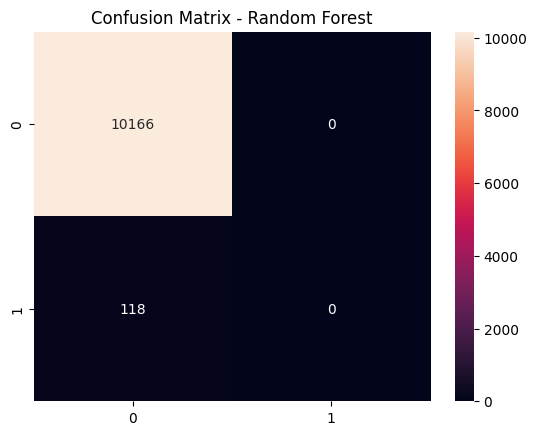

ROC-AUC: 0.7729945614661032


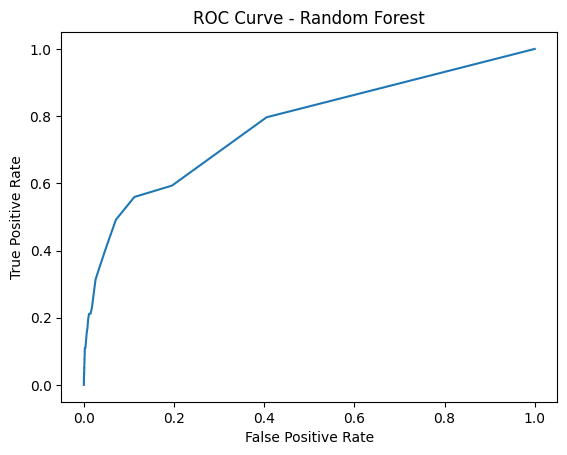

In [14]:
clf = RandomForestClassifier(random_state=42)
clf.fit(train_X, train_y)
evaluate_model(clf, val_X,val_y, "Random Forest")

# ביצוע סמוט לאיזון הנתונים

In [19]:
# יצירת מופע של SMOTE (סינתזה של דגימות הונאה חדשות)
smote = SMOTE(random_state=42)

# החלת SMOTE על קבוצת האימון – מאזנת את המחלקות
X_resampled, y_resampled = smote.fit_resample(train_X, train_y)

print("After Combined Sampling:", Counter(y_resampled))

After Combined Sampling: Counter({0: 39305, 1: 39305})


# בחירת היפר פרמטרים


--- SMOTE + Random Forest (HPO) ---
              precision    recall  f1-score   support

           0       0.99      0.66      0.79     10166
           1       0.02      0.59      0.04       118

    accuracy                           0.65     10284
   macro avg       0.51      0.62      0.41     10284
weighted avg       0.98      0.65      0.78     10284



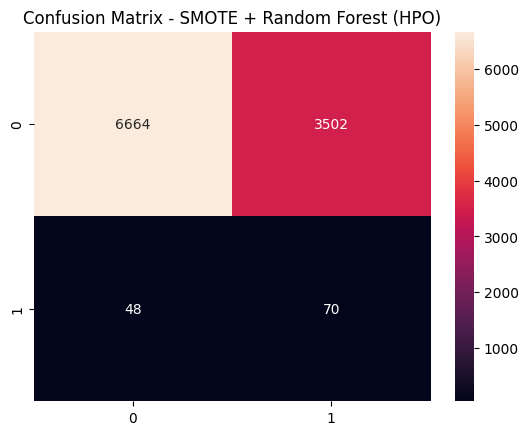

ROC-AUC: 0.6526594964271066


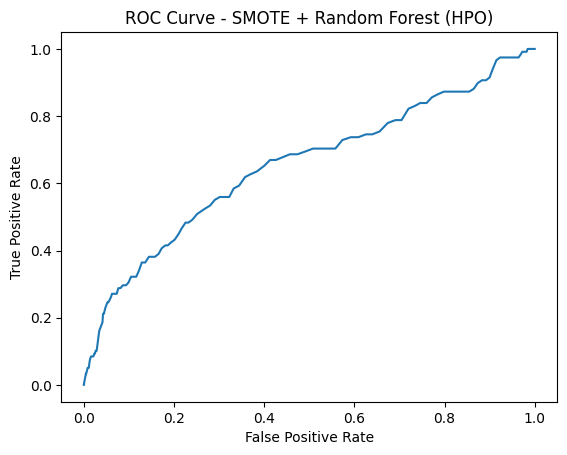

In [23]:
rf_params = {'n_estimators': [20, 50, 100, 150], 'max_depth': [None, 10, 20, 30]}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, scoring='roc_auc', cv=4, n_jobs=-1)
gs_rf.fit(X_resampled, y_resampled)
evaluate_model(gs_rf.best_estimator_, val_X, val_y, "SMOTE + Random Forest (HPO)")


# אימון המודל על כל סט האימון למקסם את מספר הנתונים
# וחיזוי על סט המבחן


--- Final Model on Test Set ---
              precision    recall  f1-score   support

           0       0.99      0.83      0.90     49471
           1       0.04      0.60      0.07       529

    accuracy                           0.82     50000
   macro avg       0.52      0.71      0.48     50000
weighted avg       0.98      0.82      0.89     50000



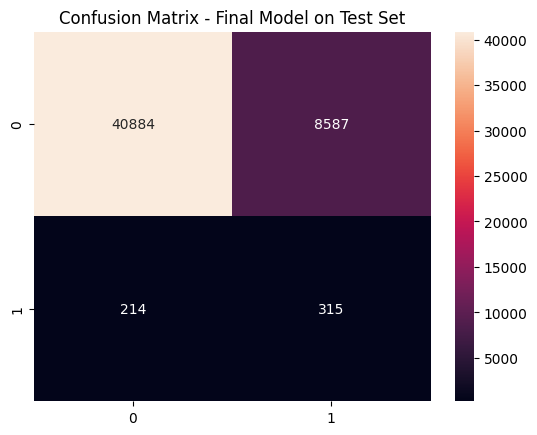

ROC-AUC: 0.7812581115766244


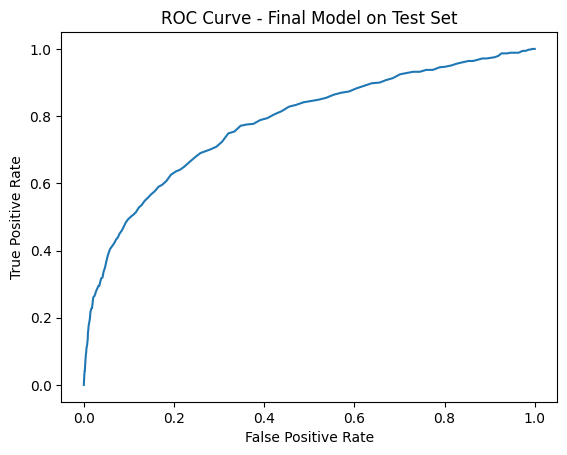

In [24]:
# 1. טעינת כל סט האימון
full_train_df = pd.read_csv("fraud_train.csv")

# 2. עיבוד מקדים
full_X, full_y = preprocess_baf_auto_scaled(full_train_df)

# 3. SMOTE על כל סט האימון
smote = SMOTE(random_state=42)
X_resampled_all, y_resampled_all = smote.fit_resample(full_X, full_y)

# 4. אימון מודל סופי עם ההיפר־פרמטרים שנבחרו
final_model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    **gs_rf.best_params_  # נלקח מ-GridSearch קודם
)
final_model.fit(X_resampled_all, y_resampled_all)

# 5. טעינת סט הטסט ועיבוד
test_df = pd.read_csv("fraud_test.csv")
test_X, test_y = preprocess_baf_auto_scaled(test_df)
test_X = test_X.reindex(columns=X_resampled_all.columns, fill_value=0)

# 6. הערכה סופית – על קבוצת הטסט בלבד
evaluate_model(final_model, test_X, test_y, "Final Model on Test Set")


# הסבר הבחירות **שלי**

בתרגיל זה בחרתי להשתמש במודל Random Forest

  בשל היציבות שלו והיכולת המובנית להתחשב באי־שוויון בין מחלקות דרך פרמטר class_weight='balanced'.

בשלב הראשון, אימנתי את המודל על הנתונים המקוריים בלבד, אך הוא לא הצליח לזהות אף מקרה של הונאה (Recall = 0).

כדי להתמודד עם חוסר האיזון החמור בדאטה,

 השתמשתי ב־SMOTE

לאיזון מלא של מחלקות (יחס 1:1 בין הונאה ללא הונאה).

בחרתי איזון מלא כי בדאטה זה קיים חוסר איזון קיצוני.

בשלב מתקדם יותר, ערכתי כיוונון היפר־פרמטרים (Grid Search) למודל

הדבר שיפר משמעותית את היכולת של המודל לזהות הונאות, על חשבון עלייה בכמות ההתרעות השגויות (Precision נמוך).


# סיכום קצר של תוצאות **המודל**

המודל הראשוני, שאומן על הדאטה הלא־מאוזן, הציג דיוק כללי גבוה מאוד (99%),

 אך לא הצליח לזהות אף מקרה של הונאה.


  לאחר שימוש ב־SMOTE


לאיזון המחלקות

  
  , המודל הצליח לזהות כ־60% ממקרי ההונאה
  (Recall = 0.6)
  
  
  שיפור מהותי ביכולת הרגישות שלו.


עם זאת,

 הדיוק בתחזיות חיוביות (Precision)

עדיין נמוך מאד (0.04),
  
  מה שמעיד על מספר רב של התרעות שווא.


  זו פשרה מוכרת כשמתמודדים עם בעיות חוסר איזון, במיוחד כשמעדיפים לאתר כמה שיותר חריגים גם במחיר של התרעות מיותרות.

  
  לסיכום, המודל לאחר SMOTE

   מציג איזון טוב יותר בין Recall ו־F1

   ומהווה בסיס חזק יותר למערכות סינון הונאות בעולם האמיתי —

אך חשוב לזכור שגם במודל כזה, נדרש איזון אתי בין זיהוי הונאות לבין הימנעות מפגיעה במשתמשים לגיטימיים.



